## Net Guardian

### DWDM Lab Project

### Team :
* Ishan Chaturvedi --- 210911312
* Meda Bharat Reddy   ---     210911308
* Dhruv Negi       ---  210911314

## Network Anomaly Detection

* Net Guardian is a machine learning project focused on spotting odd activities in network traffic
for better cybersecurity. Using smart algorithms like Decision trees and Random forests, we learn
from network data to tell apart normal actions from possible threats, like hacks or unusual access
attempts.

### UNSW-NB15 Dataset Attribute Descriptions

###### This table summarizes the attributes of the UNSW-NB15 dataset with brief descriptions:

| Attribute Name (Type) | Description |
|---|---|
| id (int) | Unique identifier for each network flow record. |
| dur (int) | Duration (milliseconds) of the network flow. |
| proto (string) | Network protocol used (e.g., TCP, UDP, ICMP). [*Categorical*] |
| service (string) | Network service involved (e.g., SSH, FTP, HTTP). [*Categorical*] |
| state (string) | Connection state (e.g., SYN_SENT, ESTABLISHED, FIN). [*Categorical*] |
| spkts (int) | Number of packets sent from the source IP address. |
| dpkts (int) | Number of packets sent from the destination IP address. |
| sbytes (int) | Number of bytes sent from the source IP address. |
| dbytes (int) | Number of bytes sent from the destination IP address. |
| rate (float) | Packet arrival rate (packets per second). |
| sttl (int) | Source IP Time to Live value. |
| dttl (int) | Destination IP Time to Live value. |
| sload (float) | Number of source-to-destination packets per second. |
| dload (float) | Number of destination-to-source packets per second. |
| slost (float) | Percentage of packets lost from the source. |
| dloss (float) | Percentage of packets lost from the destination. |
| sinpkt (int) | Inter-arrival time (milliseconds) of the first packet from the source. |
| dinpkt (int) | Inter-arrival time (milliseconds) of the first packet from the destination. |
| sjit (float) | Standard deviation of the inter-arrival times of packets from the source. |
| djit (float) | Standard deviation of the inter-arrival times of packets from the destination. |
| swin (int) | Window size of the source TCP window. |
| stcpb (int) | Bytes in the source TCP window. |
| dwin (int) | Window size of the destination TCP window. |
| dtcpb (int) | Bytes in the destination TCP window. |
| ... | (List continues with additional flow and packet characteristic details) |
| flags (string) | Combination of TCP flags observed in the flow (e.g., URG, ACK, PSH). |
| urg_flg (int) | Whether the Urgent flag was set (0 or 1). |
| ack_flg (int) | Whether the Acknowledgment flag was set (0 or 1). |
| ... | (List continues with individual TCP flag attributes) |
| finct (int) | Total number of packets with the FIN flag set. |
| synct (int) | Total number of packets with the SYN flag set. |


`* Note : `
* Only a subset of attributes has been included.
* Set of relevant attributes have been listed.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Necessary imports for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
plt.style.use('dark_background')

In [61]:
# Importing / Reading the training and testing data

train_data = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')

test_data = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')

In [62]:
# Training dataset

train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [63]:
# Testing data

test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [64]:
train_data.shape, test_data.shape

((82332, 45), (175341, 45))

### Data Analysis / Data visualisation

In [7]:
train_data.isnull().sum().sum(), test_data.isnull().sum().sum()

(0, 0)

* The data has no Missing / Null values

* Thus we can continue with model building .

In [8]:
cols = train_data.columns

cols

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [65]:
df = pd.concat([train_data, test_data])
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [10]:
df.shape

(257673, 45)

<Axes: xlabel='label'>

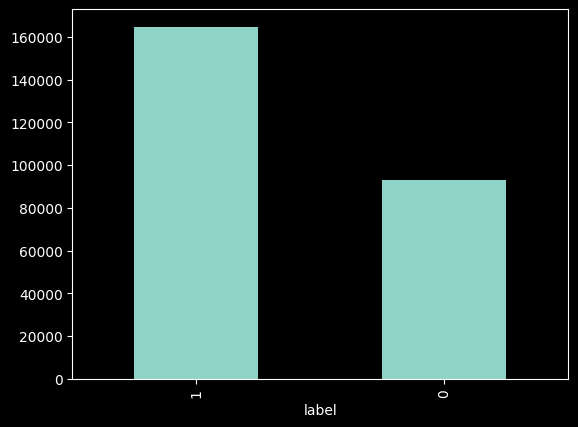

In [11]:
df['label'].value_counts().plot.bar()

In [66]:
df['proto'].value_counts()

proto
tcp       123041
udp        92701
unas       15599
arp         3846
ospf        3271
           ...  
netblt       131
rdp          131
igmp          48
icmp          15
rtp            1
Name: count, Length: 133, dtype: int64

In [67]:
df['service'].value_counts()

service
-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: count, dtype: int64

In [68]:
df['state'].value_counts()

state
FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
CLO         1
PAR         1
URN         1
no          1
Name: count, dtype: int64

In [12]:
df['label'].value_counts()

label
1    164673
0     93000
Name: count, dtype: int64

* The ratio between attack and normal data is not equal, but just slightly imbalanced, therefore, no sampling fix is needed.

### Feature Engineering

#### Dropping unnecessary features

* The first column we will drop is id, its just for identification, so we can remove this column.

* This is a binary classification problem, so we only use column label to classify attack (1) or normal (0). Then, we do not need attack details in attack_cat.

In [13]:
df = df.drop(columns = ['id', 'attack_cat'])

In [14]:
df.shape

(257673, 43)

#### Encoding categorical Variables

* One Hot Encoding the Categorical Variables

In [15]:
object_cols = df.select_dtypes(include = "object")
print(object_cols.columns)

for feature in object_cols.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])

Index(['proto', 'service', 'state'], dtype='object')


In [16]:
# Checking the one hot encoded data

print('One hot encoded data ...')
df.head()

One hot encoded data ...


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


### Data Co-Relation

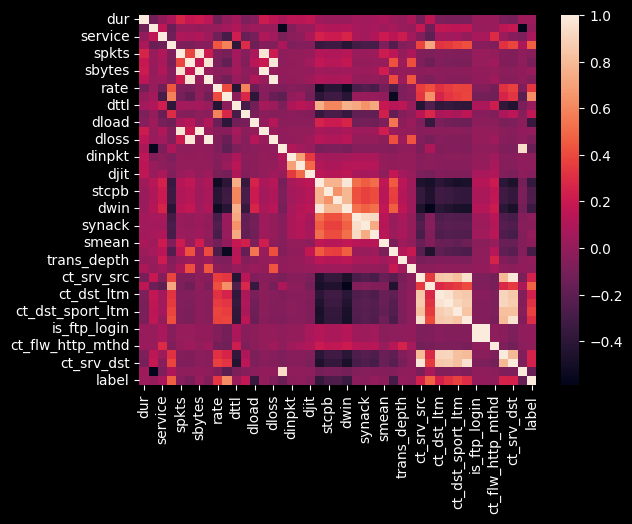

In [17]:
import seaborn as sns

sns.heatmap(df.corr())
plt.show()

In [19]:
columns = df.columns.tolist()

corr = df.corr()
corelated_vars = []

for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.85:
            print(columns[i],", " ,columns[j], " : ", corr[columns[i]][columns[j]])
            corelated_vars.append(columns[j])

spkts ,  sbytes  :  0.9643932171558754
spkts ,  sloss  :  0.9718594116511157
dpkts ,  dbytes  :  0.9734453279792993
dpkts ,  dloss  :  0.9796120849360007
sbytes ,  sloss  :  0.995771577240686
dbytes ,  dloss  :  0.9967111338314709
sinpkt ,  is_sm_ips_ports  :  0.9421206232319632
swin ,  dwin  :  0.9804584289136614
tcprtt ,  synack  :  0.9430527539835085
tcprtt ,  ackdat  :  0.9202175911910093
ct_srv_src ,  ct_src_dport_ltm  :  0.8618545947586924
ct_srv_src ,  ct_dst_src_ltm  :  0.9539519771685916
ct_srv_src ,  ct_srv_dst  :  0.9794668130725328
ct_dst_ltm ,  ct_src_dport_ltm  :  0.9615176986568873
ct_dst_ltm ,  ct_dst_sport_ltm  :  0.8711178093975873
ct_dst_ltm ,  ct_dst_src_ltm  :  0.857494026584352
ct_dst_ltm ,  ct_src_ltm  :  0.9015817705704524
ct_dst_ltm ,  ct_srv_dst  :  0.8530854336257346
ct_src_dport_ltm ,  ct_dst_sport_ltm  :  0.9083371617417906
ct_src_dport_ltm ,  ct_dst_src_ltm  :  0.8718465657501453
ct_src_dport_ltm ,  ct_src_ltm  :  0.9094302805367575
ct_src_dport_ltm ,  ct_

In [20]:
corelated_vars

['sbytes',
 'sloss',
 'dbytes',
 'dloss',
 'sloss',
 'dloss',
 'is_sm_ips_ports',
 'dwin',
 'synack',
 'ackdat',
 'ct_src_dport_ltm',
 'ct_dst_src_ltm',
 'ct_srv_dst',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_src_ltm',
 'ct_srv_dst',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_src_ltm',
 'ct_srv_dst',
 'ct_srv_dst',
 'ct_ftp_cmd']

#### Creating a new dataframe with co-related features only

In [23]:
df_drop = df.copy()

In [25]:
correlated_features = ['sbytes', 'sloss', 'dbytes', 'dloss', 'is_sm_ips_ports', 'dwin', 'synack', 'ackdat',
                        'ct_src_dport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'ct_dst_sport_ltm', 'ct_ftp_cmd']

dropped_features = [col for col in df_drop.columns if col not in ['label'] + corelated_vars]
df_drop.drop(dropped_features, axis = 1, inplace=True)

df.shape, df_drop.shape

((257673, 43), (257673, 15))

In [27]:
df.isnull().sum().sum()

0

In [28]:
df_drop.isnull().sum().sum()

0

### Data Pre-processing

#### Splitting the data into training and testing sets

In [34]:
x = df.drop('label', axis = 1)
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(206138, 42)
(51535, 42)
(206138,)
(51535,)


#### Scaling the data

In [35]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Checking the metrics for all features

In [36]:
accuracy_all = []

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes' :GaussianNB(),
}


for name, model in models.items():
   model.fit(x_train, y_train)
   scores = model.score(x_test, y_test)
   accuracy_all.append(scores)
   print(f"Model : {model} , Acuuracy : {scores * 100:.2f} %")


for name, model in models.items():
   model.fit(x_train, y_train)
   y_preds = model.predict(x_test)
   print(f"Classification Report for {model}\n")
   print(classification_report(y_test, y_preds))

Model : LogisticRegression() , Acuuracy : 89.73 %
Model : DecisionTreeClassifier() , Acuuracy : 93.85 %
Model : RandomForestClassifier() , Acuuracy : 95.24 %
Model : GaussianNB() , Acuuracy : 81.60 %
Classification Report for LogisticRegression()

              precision    recall  f1-score   support

           0       0.93      0.78      0.84     18582
           1       0.88      0.97      0.92     32953

    accuracy                           0.90     51535
   macro avg       0.91      0.87      0.88     51535
weighted avg       0.90      0.90      0.90     51535

Classification Report for DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     18582
           1       0.95      0.95      0.95     32953

    accuracy                           0.94     51535
   macro avg       0.93      0.93      0.93     51535
weighted avg       0.94      0.94      0.94     51535

Classification Report for RandomForestClassifi

### Checking the metrics for only co-related features

In [45]:
x = df_drop.drop('label', axis = 1)
y = df_drop['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(206138, 14)
(51535, 14)
(206138,)
(51535,)


In [46]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [47]:
accuracy_corr = []

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes' :GaussianNB(),
}


for name, model in models.items():
   model.fit(x_train, y_train)
   scores = model.score(x_test, y_test)
   accuracy_corr.append(scores)
   print(f"Model : {model} , Acuuracy : {scores * 100:.2f} %")


for name, model in models.items():
   model.fit(x_train, y_train)
   y_preds = model.predict(x_test)
   print(f"Classification Report for {model}\n")
   print(classification_report(y_test, y_preds))

Model : LogisticRegression() , Acuuracy : 80.29 %
Model : DecisionTreeClassifier() , Acuuracy : 93.61 %
Model : RandomForestClassifier() , Acuuracy : 94.83 %
Model : GaussianNB() , Acuuracy : 63.72 %
Classification Report for LogisticRegression()

              precision    recall  f1-score   support

           0       0.78      0.63      0.70     18709
           1       0.81      0.90      0.85     32826

    accuracy                           0.80     51535
   macro avg       0.80      0.77      0.78     51535
weighted avg       0.80      0.80      0.80     51535

Classification Report for DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     18709
           1       0.95      0.95      0.95     32826

    accuracy                           0.94     51535
   macro avg       0.93      0.93      0.93     51535
weighted avg       0.94      0.94      0.94     51535

Classification Report for RandomForestClassifi

### Checking metrics for all features except the co-related features

In [42]:
df_drop2 = df.copy()

In [43]:
df_drop2.drop(corelated_vars, axis = 1, inplace = True)

In [44]:
df_drop2.shape

(257673, 29)

In [48]:
x = df_drop2.drop('label', axis = 1)
y = df_drop2['label']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(206138, 28)
(51535, 28)
(206138,)
(51535,)


In [49]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
accuracy_un_corr = []

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes' :GaussianNB(),
}


for name, model in models.items():
   model.fit(x_train, y_train)
   scores = model.score(x_test, y_test)
   accuracy_un_corr.append(scores)
   print(f"Model : {model} , Acuuracy : {scores * 100:.2f} %")


for name, model in models.items():
   model.fit(x_train, y_train)
   y_preds = model.predict(x_test)
   print(f"Classification Report for {model}\n")
   print(classification_report(y_test, y_preds))

Model : LogisticRegression() , Acuuracy : 88.84 %
Model : DecisionTreeClassifier() , Acuuracy : 92.99 %
Model : RandomForestClassifier() , Acuuracy : 94.06 %
Model : GaussianNB() , Acuuracy : 82.73 %
Classification Report for LogisticRegression()

              precision    recall  f1-score   support

           0       0.92      0.76      0.83     18584
           1       0.88      0.96      0.92     32951

    accuracy                           0.89     51535
   macro avg       0.90      0.86      0.87     51535
weighted avg       0.89      0.89      0.89     51535

Classification Report for DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     18584
           1       0.95      0.95      0.95     32951

    accuracy                           0.93     51535
   macro avg       0.92      0.92      0.92     51535
weighted avg       0.93      0.93      0.93     51535

Classification Report for RandomForestClassifi

### Comparison of Results

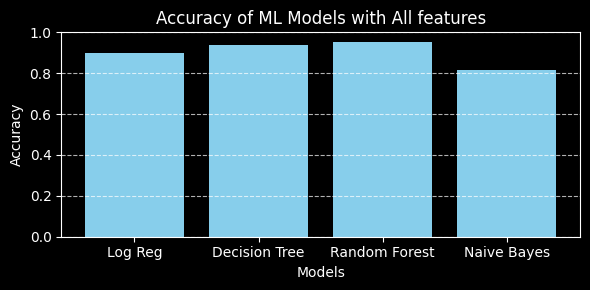

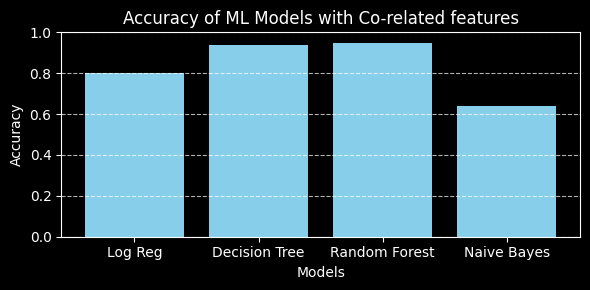

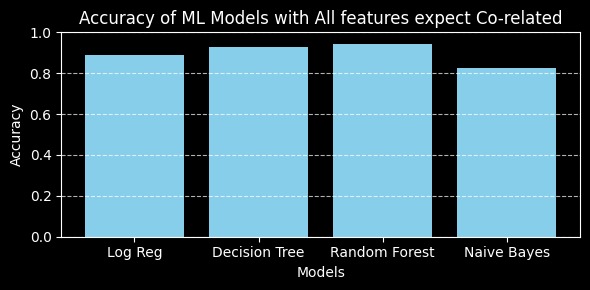

In [54]:
def plot_model_accuracies(models, accuracies, condition):
    plt.figure(figsize=(6, 3))
    plt.bar(models, accuracies, color='skyblue')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy of ML Models with {condition}')

    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


model_names = ['Log Reg', 'Decision Tree', 'Random Forest', 'Naive Bayes']

plot_model_accuracies(model_names, accuracy_all, 'All features')
plot_model_accuracies(model_names, accuracy_corr, 'Co-related features')
plot_model_accuracies(model_names, accuracy_un_corr, 'All features expect Co-related')